**The Convolution Layer**

**The Architecture of a CNN**
   - Input Image 
   - Convolution Layer
   - Pooling Layer
   - Flattening  

- A convolution layer consists of two parts:
    - Feature Detector
    - Feature Map


<p>
    
**Feature detector or filter**: This is a matrix or pattern that you put on an image to transform it into a feature map.

**Feature map**: This is the reduced image that is produced by the convolution of an image and feature detector

**The Pooling Layer**: Ignore the less important data in the image and reduces the image further. while preserving its important features. The pooled image is flattened and converted into a single column. Each row is made into a column and stacked one over another.Example: 3x3 matrix is converted  into a 1x9 matrix.
    
**Flattening**: It is a part of a CNN where the image is made ready to use as an input to an ANN. 
</p>

**How to add first layer to a CNN**

classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation="relu"))

<p>

**Note**: 32,3,3 refers to the fact that there are 32 feature detectors of size 3x3. As a good practice, always start with 32; you can add 64 or 128 later.32,3,3 refers to the fact that there are 32 feature detectors of size 3x3. As a good practice, always start with 32; you can add 64 or 128 later.

</p>

**How to fit the data that has been created**


    
classifier.fit_generator(training_set,steps_per_epoch = 5000,\
                        epochs = 25,validation_data = test_set,
                         validation_steps = 1000)
**steps_per_epoch**: Number of training images
**validation_data** Number of test images 

**Data Agumentation**: Data augmentation creates many batches of our images. It applies random transformations to random images inside the batches.
Data transformation can be rotating images, shifting them, flipping them, and so on

**Syntax to perform data agumentation**
<p>
    
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=0.1,shear_range = 0.3, ....)

**Advantages of Data Agumentation**: Reduce Overfitting, Generates More images,
</p>

#### Building a CNN and Identifying Images of Cars and Flowers

##### Import the numpy library and the necessary Keras libraries and classes:


In [1]:
import keras

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D,Conv2D,MaxPool2D, Flatten, Dense
import numpy as np
from tensorflow import random

In [3]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)
classifier = Sequential()

##### Add first layer to CNN

- Add the first layer of the CNN, set the input shape to (64, 64, 3).
- The dimension of each image, and set the activation function as a ReLU.


In [4]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))




##### Add Pooling Layer

- add the pooling layer with the image size as 2x2

In [5]:
classifier.add(MaxPool2D(2,2))

##### Add flatten layer

- Flatten the output of the pooling layer by adding a flattening layer to the CNN model:


In [6]:
classifier.add(Flatten())

#### Add Dense layers to the network

- Add the first Dense layer of the ANN. Here, 128 is the output of the number of nodes.
- As a good practice, 128 is good to get started. activation is relu. 

In [7]:
classifier.add(Dense(128,activation="relu"))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))

##### Add Output layer to the network with activation as "Sigmoid"

In [8]:
classifier.add(Dense(1,activation="sigmoid"))

##### Compile the model

- Compile the network with an adam optimizer and compute the accuracy during the training process

In [9]:
classifier.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

#### Create training and testing data generators

- Create training and test data generators.
- Rescale the training and test images by 1/255 so that all the values are between 0 and 1.
- Set these parameters for the training data generators only – shear_range=0.2, zoom_range=0.2, and horizontal_flip=True:


In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255,shear_range= 0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

#### Create a training set from the training set folder

- '../dataset/training_set' is the folder where our data has been placed. 
- Our CNN model has an image size of 64x64.
- So the same size should be passed here too. 
- Batch_size is the number of images in a single batch, which is 32. 
- Class_mode is set to binary since we are working on binary classifiers

In [13]:
training_set = train_datagen.flow_from_directory(r"C:\Users\abc\Desktop\The Deep Learning with Keras Workshop\Image_Classifer_Dataset\training_set",
                                                 target_size=(64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10764 images belonging to 2 classes.


In [14]:
testing_set = test_datagen.flow_from_directory(r"C:\Users\abc\Desktop\The Deep Learning with Keras Workshop\Image_Classifer_Dataset\test_set",
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 2674 images belonging to 2 classes.


#### Fit the data

- Set the steps_per_epoch to 10000 and the validation_steps to 2500. 

In [15]:
classifier.fit_generator(training_set,steps_per_epoch=10000,validation_steps=2500,epochs=2,validation_data=testing_set)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
10000/10000 [==============================] - 155s 15ms/step - loss: 0.4845 - accuracy: 0.7717 - val_loss: 0.4068 - val_accuracy: 0.8164


**Expriement more on the above data**
 - To get more accurate results, try increasing the number of epochs to about 25. 
 - change the activation function in the output layer to "Softmax" and check the accuracy. (Most Probable should decrease)
 - Change optmiser from adam to SGD

#### How to classifty New image 

In [16]:
from keras.preprocessing import image

In [34]:
new_image = image.load_img(r"C:\Users\abc\Desktop\The Deep Learning with Keras Workshop\Image_Classifer_Dataset\test_image.jpg",
                          target_size=(64,64))

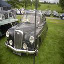

In [18]:
new_image

##### Print the class Labels attributes of training set

- Print the class labels located in the class_indices attribute of the training set:

In [19]:
training_set.class_indices

{'car': 0, 'flower': 1}

##### Process the image:

In [24]:
new_image = image.img_to_array(new_image)

In [25]:
new_image

array([[[ 72.,  76.,  87.],
        [ 84.,  88., 100.],
        [120., 123., 138.],
        ...,
        [ 56.,  62.,  34.],
        [ 29.,  36.,   5.],
        [ 47.,  54.,  23.]],

       [[ 72.,  79.,  89.],
        [ 77.,  83.,  97.],
        [ 81.,  87., 103.],
        ...,
        [ 37.,  43.,  17.],
        [ 68.,  74.,  46.],
        [ 49.,  55.,  27.]],

       [[ 68.,  76.,  87.],
        [ 78.,  86.,  99.],
        [ 82.,  89., 107.],
        ...,
        [ 54.,  60.,  34.],
        [ 60.,  66.,  40.],
        [ 43.,  48.,  25.]],

       ...,

       [[ 53.,  62.,   7.],
        [ 59.,  68.,  11.],
        [ 72.,  82.,  22.],
        ...,
        [ 65.,  76.,  18.],
        [ 66.,  77.,  21.],
        [ 57.,  68.,  12.]],

       [[ 50.,  59.,   4.],
        [ 59.,  68.,  11.],
        [ 64.,  74.,  14.],
        ...,
        [ 56.,  67.,   9.],
        [ 56.,  67.,  11.],
        [ 56.,  67.,  11.]],

       [[ 48.,  57.,   2.],
        [ 60.,  69.,  12.],
        [ 59.,  

In [26]:
new_image = np.expand_dims(new_image, axis=0)
new_image

array([[[[ 72.,  76.,  87.],
         [ 84.,  88., 100.],
         [120., 123., 138.],
         ...,
         [ 56.,  62.,  34.],
         [ 29.,  36.,   5.],
         [ 47.,  54.,  23.]],

        [[ 72.,  79.,  89.],
         [ 77.,  83.,  97.],
         [ 81.,  87., 103.],
         ...,
         [ 37.,  43.,  17.],
         [ 68.,  74.,  46.],
         [ 49.,  55.,  27.]],

        [[ 68.,  76.,  87.],
         [ 78.,  86.,  99.],
         [ 82.,  89., 107.],
         ...,
         [ 54.,  60.,  34.],
         [ 60.,  66.,  40.],
         [ 43.,  48.,  25.]],

        ...,

        [[ 53.,  62.,   7.],
         [ 59.,  68.,  11.],
         [ 72.,  82.,  22.],
         ...,
         [ 65.,  76.,  18.],
         [ 66.,  77.,  21.],
         [ 57.,  68.,  12.]],

        [[ 50.,  59.,   4.],
         [ 59.,  68.,  11.],
         [ 64.,  74.,  14.],
         ...,
         [ 56.,  67.,   9.],
         [ 56.,  67.,  11.],
         [ 56.,  67.,  11.]],

        [[ 48.,  57.,   2.],
       

##### Predict the new Image

In [27]:
result = classifier.predict(new_image)

In [35]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)
print(result)
if result[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

print(prediction)

[[2.1645016e-15]]
It is a car


**Second Test case**

In [48]:
new_image2 = image.load_img(r"C:\Users\abc\Desktop\The Deep Learning with Keras Workshop\Image_Classifer_Dataset\test_image1.jpg",
                           target_size=(64,64))

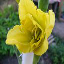

In [49]:
new_image2

In [50]:
new_image2 = image.img_to_array(new_image2)
new_image2 = np.expand_dims(new_image2, axis=0)
result2 = classifier.predict(new_image2)
if result2[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

print(prediction)

It is a flower


In [54]:
new_image3 = image.load_img(r"C:\Users\abc\Desktop\The Deep Learning with Keras Workshop\Image_Classifer_Dataset\test_image_2.jpg",
                           target_size=(64,64))
new_image3 = image.img_to_array(new_image3)
new_image3 = np.expand_dims(new_image3, axis=0)
result3 = classifier.predict(new_image3)
if result3[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'

In [59]:
# new_image3